In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [3]:
digits = pd.read_csv('train.csv')

In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
four = digits.iloc[3,1:]
four.shape

(784,)

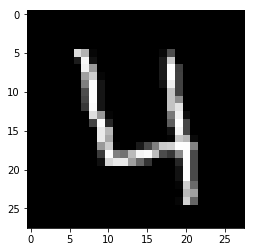

In [22]:
four = four.values.reshape(28,28)
plt.imshow(four,cmap= 'gray')

In [23]:
print(four[5:-5,5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [28]:
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [35]:
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [36]:
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# Data Preparation for Model Building

In [37]:
X = digits.iloc[:,1:]
Y = digits.iloc[:,0]

In [38]:
from sklearn.preprocessing import scale

X = scale(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.1, random_state = 101)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [41]:
from sklearn import svm 
from sklearn import metrics

In [42]:
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred = linear_svm.predict(x_test)

In [44]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred)

0.9042592592592592

In [45]:
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]],
      dtype=int64)

In [47]:
class_wise = metrics.classification_report(y_true=y_test,y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

   micro avg       0.90      0.90      0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [48]:
gc.collect()

4280

In [49]:
non_svm = svm.SVC(kernel='rbf')
non_svm.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
prediction = non_svm.predict(x_test)

metrics.accuracy_score(y_true=y_test,y_pred=prediction)

0.9255820105820106

In [51]:
non_svm2 = svm.SVC(kernel='poly')
non_svm2.fit(x_train,y_train)
prediction2 = non_svm2.predict(x_test)

metrics.accuracy_score(y_true=y_test,y_pred=prediction2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7586507936507937

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:


hyper = {'C':[1,10,100], 'gamma':[1e-2,1e-3,1e-4]}

svc_grid_search = svm.SVC(kernel='rbf')

gridmodel = GridSearchCV(svc_grid_search,hyper,scoring='accuracy', )

In [56]:
gridmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
cv_results = pd.DataFrame(gridmodel.cv_results_)
cv_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.261053,0.082211,3.129677,0.016505,1,0.01,"{'C': 1, 'gamma': 0.01}",0.723450,0.707857,0.712241,0.714524,0.006570,9,1.000000,1.000000,1.000000,1.000000,0.000000
1,3.780698,0.043114,2.153547,0.007815,1,0.001,"{'C': 1, 'gamma': 0.001}",0.919458,0.905714,0.914102,0.913095,0.005659,4,0.964962,0.967500,0.967892,0.966785,0.001298
2,5.671283,0.095318,2.737718,0.026132,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.867427,0.864286,0.872584,0.868095,0.003419,6,0.891312,0.890000,0.893329,0.891547,0.001369
3,11.300259,0.061600,3.110336,0.036423,10,0.01,"{'C': 10, 'gamma': 0.01}",0.742694,0.727143,0.732283,0.734048,0.006473,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,3.219330,0.038717,1.960831,0.014215,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937990,0.914286,0.916249,0.922857,0.010748,1,0.999285,0.999643,1.000000,0.999643,0.000292
5,2.559961,0.032069,1.779879,0.019015,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920171,0.906429,0.913386,0.913333,0.005613,3,0.959957,0.959286,0.958259,0.959167,0.000698
6,11.316622,0.201039,3.111231,0.037811,100,0.01,"{'C': 100, 'gamma': 0.01}",0.742694,0.727143,0.732283,0.734048,0.006473,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,3.271939,0.012011,1.984604,0.004955,100,0.001,"{'C': 100, 'gamma': 0.001}",0.937277,0.912857,0.916965,0.922381,0.010683,2,1.000000,1.000000,1.000000,1.000000,0.000000
8,2.074968,0.068640,1.596242,0.035231,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920884,0.898571,0.908375,0.909286,0.009137,5,0.998212,0.997857,0.998930,0.998333,0.000446


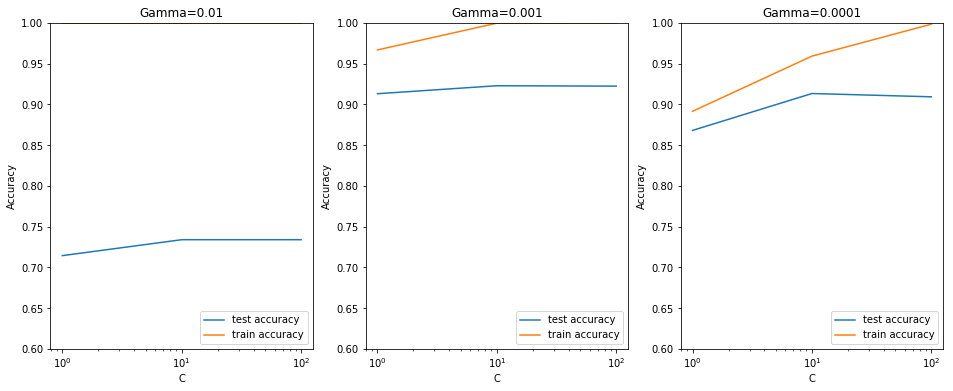

In [58]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

## ploting

plt.figure(figsize=(16,6))
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'], loc='lower right')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'], loc='lower right')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.ylim([0.60,1])
plt.legend(['test accuracy','train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [59]:
best_c = 1
best_gamma = 0.001

svm_final = svm.SVC(kernel='rbf', C=best_c,gamma=best_gamma)

svm_final.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
predictions3 = svm_final.predict(x_test)

In [63]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions3)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions3)

print(test_accuracy, "\n")
print(confusion)

0.924973544973545 

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


In [66]:
best_c = 9
best_gamma = 0.001

svm_final1 = svm.SVC(kernel='rbf', C=best_c,gamma=best_gamma)

svm_final1.fit(x_train,y_train)

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
predictions4 = svm_final1.predict(x_test)
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions4)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions4)

print(test_accuracy, "\n")
print(confusion)

0.932063492063492 

[[3615    0   10   13    4   12   38   11   10    2]
 [   0 4107   12   18    5    2    5   21    9    6]
 [  30   20 3438   62   37    4   37  110   41   11]
 [   8    9   92 3546    5   88    6   71   44   31]
 [   4   10   31    5 3462   11   33   46    3   97]
 [  22   21   12  115   20 3059   62   50   31   26]
 [  27    7   11    1    9   27 3548   47   16    0]
 [   5   23   22   11   49    4    2 3752   10   76]
 [  10   38   47   78   21   83   25   49 3289   25]
 [  16    7   18   28   95   12    0  171   15 3416]]
